In [1]:
%pylab inline
from landlab import RasterModelGrid
from landlab.plot.imshow import imshow_grid_at_node
from landlab.components import PresFlowNetwork, MeltCreep
import numpy as np
from matplotlib import colors,  cm
import matplotlib.animation as animation

from PIL import Image
from PIL import ImageDraw

def plot_links(grid, value_name, autoscale=True, 
               vmin=0., vmax=0., cmap_name='viridis', 
               magnitude= False, lw=5, 
               pixels_per_node=31, x_name='X', 
               y_name='Y', var_name='', use_PIL=True):#, logvalues=False ):
    if use_PIL:
        pixel_xscaling_factor = pixels_per_node/grid.dx
        pixel_yscaling_factor = pixels_per_node/grid.dy
        im = Image.new('RGBA', ( int(round(grid.number_of_cell_columns*pixels_per_node)), int(round(grid.number_of_cell_rows*pixels_per_node)) ), (255,255,255,255))
        draw = ImageDraw.Draw(im)

    link_head_x = grid.node_x[grid.node_at_link_head]
    link_head_y = grid.node_y[grid.node_at_link_head]
    link_tail_x = grid.node_x[grid.node_at_link_tail]
    link_tail_y = grid.node_y[grid.node_at_link_tail]       
    if magnitude:
        values = abs(grid.at_link[value_name])
    else:
        values = grid.at_link[value_name]
    #if logvalues:
    #    values = np.log10(abs(grid.at_link[value_name]))
    
    
    
    #Normalize color values
    if autoscale:
        cnorm = colors.Normalize()
        cnorm.autoscale(values)
    else:
        cnorm = colors.Normalize(vmin,vmax)
    scalarMap = cm.ScalarMappable(norm=cnorm, cmap = get_cmap(cmap_name))
    scalarMap.set_array(values)
    #set_cmap()
    if use_PIL:
        for i, value in enumerate(values):
            draw.line( ((link_head_x[i]*pixel_xscaling_factor,link_head_y[i]*pixel_yscaling_factor),(link_tail_x[i]*pixel_xscaling_factor,link_tail_y[i]*pixel_yscaling_factor)),fill=scalarMap.to_rgba(value,bytes=True),width=lw) 
        imshow(np.asarray(im), origin='lower', extent=(0,grid.number_of_cell_columns,0,grid.number_of_cell_rows))
    else:
        for i, value in enumerate(values):
            xs = [link_head_x[i],link_tail_x[i]]
            ys = [link_head_y[i],link_tail_y[i]]
            img = plot(xs,ys,lw=lw,color=scalarMap.to_rgba(value))    
    cb = colorbar(scalarMap)
    cb.ax.set_ylabel(var_name)
    xlabel(x_name)
    ylabel(y_name)


Populating the interactive namespace from numpy and matplotlib


In [9]:
mg = RasterModelGrid((5,10),100)
junc_elev = mg.add_zeros('node', 'junction__elevation')
R = mg.add_zeros('node', 'input__discharge')
h = mg.add_zeros('node', 'hydraulic__head')
Q = mg.add_zeros('link', 'conduit__discharge')
mg.add_zeros('node','storage')
mg.at_node['storage']=10.*np.ones(mg.number_of_nodes)

#mg.at_node['junction__elevation'] = -0.01*mg.node_x + 4.

w = mg.add_zeros('link','width')
mg.at_link['width']= 1.0*np.ones(mg.number_of_links)#.*np.random.rand(mg.number_of_active_links)

d_h = mg.add_zeros('link','hydraulic__diameter')
mg.at_link['hydraulic__diameter'] =  np.ones(mg.number_of_links)#np.random.rand(mg.number_of_links)#mg.at_link['width'].copy()

#Set up link elevation offsets
xc_min_head = mg.add_zeros('link', 'conduit_head__offset')
xc_min_tail = mg.add_zeros('link', 'conduit_tail__offset')
y_max = mg.add_zeros('link', 'maximum__depth')
#mg.at_link['maximum__depth']= mg.at_link['width']#applicable for square conduits

#print(mg.at_link['maximum__depth'])

#set heads at edges
h[mg.nodes_at_top_edge] = 0.
h[mg.nodes_at_bottom_edge] = 0.
h[mg.nodes_at_left_edge] = 10.
h[mg.nodes_at_right_edge] = 0.


mg.set_closed_boundaries_at_grid_edges(False,True,False,True)
Q[mg.active_links] = 0.1#0.1*np.random.rand(mg.number_of_active_links)
n_core = mg.number_of_core_nodes
links = mg.links_at_node
print("Number of links = ", mg.number_of_links)
print("Number of nodes = ", mg.number_of_nodes)
print("Number of active links = ", mg.number_of_active_links)
print("Number of core nodes = ", mg.number_of_core_nodes)

pfn = PresFlowNetwork(mg, cross_sections='circ')

for i in arange(500):
    print('Time iteration:', i)
    pfn.dyn_wave_solution(dt_min=5., outflow_bnd_type = 'head')
 



Number of links =  85
Number of nodes =  50
Number of active links =  43
Number of core nodes =  24
Time iteration: 0
dt= 7.63516286714    dt_h= 8.81333377934   dt_Cr= 7.63516286714
average dh= 0.00218141851953   average abs(dQ)= 0.0498244416648
num iters= 11
Time iteration: 1
average dh= 0.131602383205   average abs(dQ)= 0.191391544244
num iters= 25
Time iteration: 2
average dh= 0.250457600438   average abs(dQ)= 0.0856384783912
num iters= 15
Time iteration: 3
average dh= 0.266227682182   average abs(dQ)= 0.0834975717464
num iters= 16
Time iteration: 4
average dh= 0.253271317742   average abs(dQ)= 0.0722512068101
num iters= 14
Time iteration: 5
average dh= 0.237949028923   average abs(dQ)= 0.065833307909
num iters= 15
Time iteration: 6
average dh= 0.224888583347   average abs(dQ)= 0.057400529216
num iters= 13
Time iteration: 7
average dh= 0.214078658064   average abs(dQ)= 0.0485547724216
num iters= 14
Time iteration: 8
average dh= 0.20502567982   average abs(dQ)= 0.0498840146895
num it

average dh= 0.0135620822277   average abs(dQ)= 0.00104837411013
num iters= 8
Time iteration: 98
average dh= 0.0127794249156   average abs(dQ)= 0.000989212266812
num iters= 8
Time iteration: 99
average dh= 0.0120417748476   average abs(dQ)= 0.000933196629486
num iters= 8
Time iteration: 100
dt= 17.2646444774    dt_h= 17.2646444774   dt_Cr= 22.5231740752
average dh= 0.0113488353811   average abs(dQ)= 0.000880767592146
num iters= 7
Time iteration: 101
average dh= 0.0145916526359   average abs(dQ)= 0.00113166829327
num iters= 8
Time iteration: 102
average dh= 0.0134427040704   average abs(dQ)= 0.00104575877501
num iters= 8
Time iteration: 103
average dh= 0.0123830292237   average abs(dQ)= 0.000965212021272
num iters= 8
Time iteration: 104
average dh= 0.0114093470741   average abs(dQ)= 0.000890785025374
num iters= 7
Time iteration: 105
average dh= 0.0105138253073   average abs(dQ)= 0.000823975112779
num iters= 7
Time iteration: 106
average dh= 0.00968699941723   average abs(dQ)= 0.000760675

average dh= 1.87483203958e-05   average abs(dQ)= 0.0192830825286
num iters= 50
Time iteration: 194
average dh= 3.83454977215e-05   average abs(dQ)= 0.104778676122
num iters= 50
Time iteration: 195
average dh= 8.99055380203e-05   average abs(dQ)= 0.193543421867
num iters= 50
Time iteration: 196
average dh= 7.72386732292e-05   average abs(dQ)= 0.16116273611
num iters= 50
Time iteration: 197
average dh= 1.63499686199e-05   average abs(dQ)= 0.219828936098
num iters= 50
Time iteration: 198
average dh= -3.43230191383e-05   average abs(dQ)= 0.163994546209
num iters= 50
Time iteration: 199
average dh= -5.69083558688e-05   average abs(dQ)= 0.222037652506
num iters= 50
Time iteration: 200
dt= 5.0    dt_h= 2.20729471157   dt_Cr= 22.1060470865
average dh= -6.37605745318e-05   average abs(dQ)= 0.163503275985
num iters= 50
Time iteration: 201
average dh= -1.85926185077e-05   average abs(dQ)= 0.0331145412443
num iters= 10
Time iteration: 202
average dh= -1.89966143834e-05   average abs(dQ)= 0.0411479

average dh= 3.31152447358e-05   average abs(dQ)= 0.0980258656691
num iters= 50
Time iteration: 273
average dh= 9.21376936231e-05   average abs(dQ)= 0.199802379311
num iters= 50
Time iteration: 274
average dh= 8.84775948736e-05   average abs(dQ)= 0.16158317526
num iters= 50
Time iteration: 275
average dh= 2.37523837489e-05   average abs(dQ)= 0.220531740755
num iters= 50
Time iteration: 276
average dh= -3.40611574318e-05   average abs(dQ)= 0.164130497267
num iters= 50
Time iteration: 277
average dh= -6.03418485801e-05   average abs(dQ)= 0.221712984003
num iters= 50
Time iteration: 278
average dh= -6.79345602885e-05   average abs(dQ)= 0.163461582995
num iters= 50
Time iteration: 279
average dh= -6.63223457535e-05   average abs(dQ)= 0.224344269826
num iters= 50
Time iteration: 280
dt= 5.0    dt_h= 2.20388289476   dt_Cr= 22.1058181945
average dh= -6.24221860079e-05   average abs(dQ)= 0.163452743297
num iters= 50
Time iteration: 281
average dh= -1.76419497896e-05   average abs(dQ)= 0.0328894

average dh= 3.32218355722e-05   average abs(dQ)= 0.0980185474493
num iters= 50
Time iteration: 353
average dh= 9.22401762334e-05   average abs(dQ)= 0.199806824016
num iters= 50
Time iteration: 354
average dh= 8.85805448039e-05   average abs(dQ)= 0.161583753192
num iters= 50
Time iteration: 355
average dh= 2.38423112746e-05   average abs(dQ)= 0.220532074032
num iters= 50
Time iteration: 356
average dh= -3.39892013878e-05   average abs(dQ)= 0.164131227454
num iters= 50
Time iteration: 357
average dh= -6.02817530142e-05   average abs(dQ)= 0.22171323292
num iters= 50
Time iteration: 358
average dh= -6.78812531398e-05   average abs(dQ)= 0.163462132913
num iters= 50
Time iteration: 359
average dh= -6.62737777377e-05   average abs(dQ)= 0.224345179889
num iters= 50
Time iteration: 360
dt= 5.0    dt_h= 2.20387398651   dt_Cr= 22.1058186941
average dh= -6.23781552162e-05   average abs(dQ)= 0.163453306614
num iters= 50
Time iteration: 361
average dh= -1.7632674204e-05   average abs(dQ)= 0.03288950

average dh= 9.22405861785e-05   average abs(dQ)= 0.199806841862
num iters= 50
Time iteration: 434
average dh= 8.85809568157e-05   average abs(dQ)= 0.161583755505
num iters= 50
Time iteration: 435
average dh= 2.38426711319e-05   average abs(dQ)= 0.220532075351
num iters= 50
Time iteration: 436
average dh= -3.39889135903e-05   average abs(dQ)= 0.164131230379
num iters= 50
Time iteration: 437
average dh= -6.02815127393e-05   average abs(dQ)= 0.221713233897
num iters= 50
Time iteration: 438
average dh= -6.78810400203e-05   average abs(dQ)= 0.163462135112
num iters= 50
Time iteration: 439
average dh= -6.6273583551e-05   average abs(dQ)= 0.224345183523
num iters= 50
Time iteration: 440
dt= 5.0    dt_h= 2.2038739509   dt_Cr= 22.1058186961
average dh= -6.23779791622e-05   average abs(dQ)= 0.163453308867
num iters= 50
Time iteration: 441
average dh= -1.76326371154e-05   average abs(dQ)= 0.0328895012166
num iters= 10
Time iteration: 442
average dh= -1.78622779175e-05   average abs(dQ)= 0.0413118

Node net fluxes =  [ 0.00553892 -0.01111538  0.01315438 -0.01432174  0.01409158 -0.01242543
  0.00933387 -0.00289793 -0.01142356  0.02178502 -0.02665339  0.02851908
 -0.02813205  0.02511483 -0.018329    0.00611114  0.00553892 -0.01111538
  0.01315438 -0.01432174  0.01409158 -0.01242543  0.00933387 -0.00289793]
Node head =  [ 10.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
  10.           9.16036062   8.33616698   7.4858081    6.66605504
   5.81367508   4.99347764   4.14401524   3.31721684   0.
  10.           9.17352977   8.31567016   7.5093919    6.64127065
   5.8381834    4.97086027   4.16256173   3.30953261   0.
  10.           9.16036062   8.33616698   7.4858081    6.66605504
   5.81367508   4.99347764   4.14401524   3.31721684   0.
  10.           0.           0.           0.           0.
   0.           0.           0.           0.           0.        ]
Discharge= [ -1.00455804e+00  -9.99964673e-01  -1.00847726e+00

Text(0, 0.5, 'D_H')

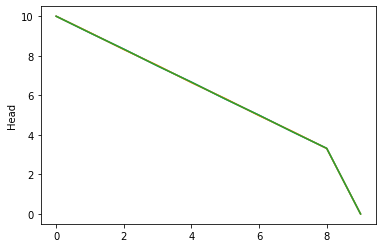

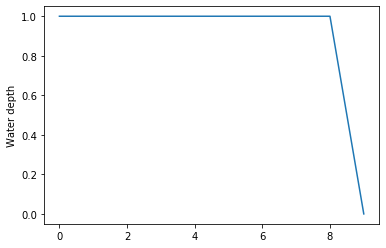

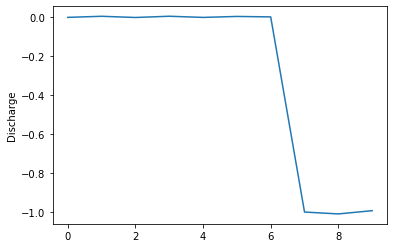

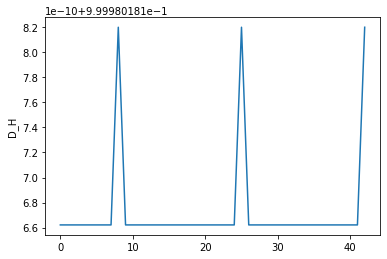

In [10]:
print("Node net fluxes = ",mg.calc_net_flux_at_node(Q)[mg.core_nodes]/mg.dx - mg.at_node['input__discharge'][mg.core_nodes])
print("Node head = ",h)

figure()
plot(h[10:20])
plot(h[20:30])
plot(h[30:40])
ylabel('Head')

print('Discharge=',Q[mg.active_links])
#Discharge from DW equation
L = max(mg.node_x)
deltaH = max(h[mg.nodes_at_left_edge]) - min(h[mg.nodes_at_right_edge])
f=0.1
g=9.8
D_H = 1. 
print('DW discharge = ', D_H**2.*sqrt(2*g*D_H*deltaH/f/L))


figure()
water_depth = mg.at_node['hydraulic__head'][10:20] - mg.at_node['junction__elevation'][10:20]
water_depth[water_depth>1.] = 1.
plot(water_depth)
ylabel('Water depth')


figure()
plot(Q[mg.active_links][10:20])
ylabel('Discharge')

figure()
plot(mg.at_link['hydraulic__diameter'][mg.active_links])
ylabel('D_H')



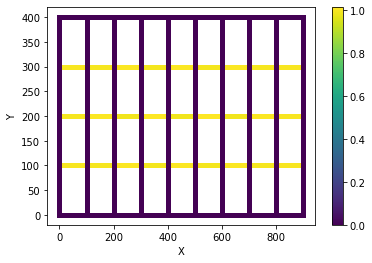

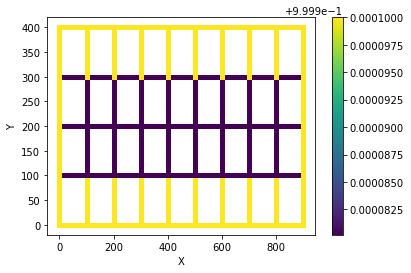

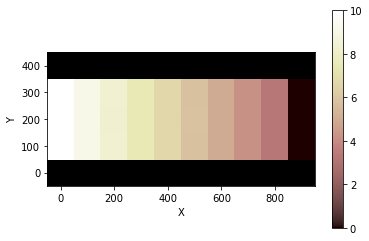

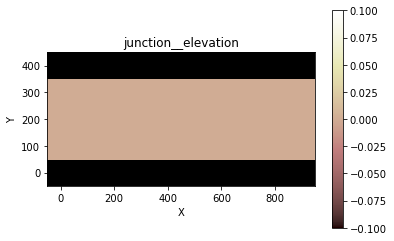

In [11]:
figure()
plot_links(mg, 'conduit__discharge',magnitude=True, use_PIL=False)
figure()
plot_links(mg, 'hydraulic__diameter', use_PIL=False)
figure()
imshow_grid_at_node(mg, h)
figure()
imshow_grid_at_node(mg, 'junction__elevation')


In [3]:
ymins = pfn.xc_y.min(axis=1)
fd = 0.25
ywet = fd + ymins
wet_compare = broadcast_to(ywet, pfn.xc_y.transpose().shape).transpose()

In [4]:
y = pfn.xc_y[pfn.xc_y<wet_compare]
x = pfn.xc_x[pfn.xc_y<wet_compare]


In [6]:
wantids = pfn.xc_y<wet_compare
al = mg.active_links

wantids = wantids[al]
xm = pfn.xc_xm[al]
x = pfn.xc_x[al]
ym = pfn.xc_ym[al]
y = pfn.xc_y[al]
xp = pfn.xc_xp[al]
yp = pfn.xc_yp[al]
sA = (xm*y - x*ym) * 0.5

sA[~wantids] = 0.
#sA.sum(axis=1).shape
l=hypot(x-xp,y-yp)

np.sum(l,axis=1).shape


(43,)

In [11]:
if type(wantids) == type(None):
    print('ok')
    
type(None)

NoneType

In [28]:
mg.at_node['xc'].shape

###Perhaps should use arrays assigned onto landlab grid directly rather than new XC object

#####Next step, write code to initialize a xc and calculate d_h


(50, 102)

In [30]:
test[0]

array([ 0.77098428,  0.99830551,  0.30540551,  0.16738251,  0.97547085,
        0.50562703,  0.3066864 ,  0.91680595,  0.75297932,  0.89573101,
        0.9789894 ,  0.22019379,  0.46192489,  0.52944941,  0.54894687,
        0.32878777,  0.08452175,  0.56110957,  0.19784226,  0.43651093,
        0.07500121,  0.7743863 ,  0.92028291,  0.54257637,  0.10737806,
        0.29654272,  0.45352767,  0.74517833,  0.68868763,  0.52853944,
        0.93739432,  0.77370938,  0.37612989,  0.10347197,  0.48148967,
        0.91079636,  0.51063425,  0.79151537,  0.22654909,  0.48952004,
        0.72264249,  0.36246573,  0.6133074 ,  0.33141574,  0.1679346 ,
        0.45132052,  0.00793738,  0.20381963,  0.04322713,  0.53853515,
        0.63317882,  0.21504866,  0.13715971,  0.51394557,  0.23371014,
        0.86070008,  0.46032999,  0.33292212,  0.30586548,  0.65787874,
        0.09571825,  0.64570054,  0.46329052,  0.25167447,  0.65267125,
        0.03331604,  0.98985786,  0.0458048 ,  0.81389259,  0.58

In [9]:
from ShapeGen import genCirc,genEll

In [11]:
x,y = genEll(array([12,6,2,34,5,6]),array([12,6,2,34,5,6]),d=500,theta = 1)

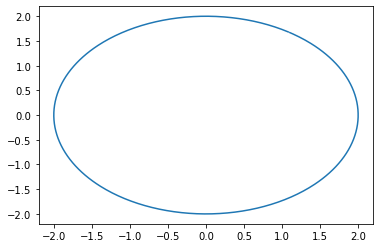

In [12]:
plot(x[2],y[2])

In [34]:
r1 = array([1,4,2,5,6])
t = linspace(0,2*pi, 200)

In [42]:
broadcast_to(r1,(len(r1),len(t)))*cos(broadcast_to(t,(len(r1),len(t))))

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (5,) and requested shape (5,200)

In [46]:
broadcast_to(r1,(len(t),len(r1))).transpose()*cos(broadcast_to(t,(len(r1),len(t))))

array([[ 1.        ,  0.99950159,  0.99800685,  0.99551728,  0.99203536,
         0.98756455,  0.98210932,  0.9756751 ,  0.96826831,  0.95989632,
         0.95056749,  0.94029111,  0.92907743,  0.91693763,  0.9038838 ,
         0.88992896,  0.87508702,  0.85937278,  0.84280189,  0.82539088,
         0.8071571 ,  0.78811873,  0.76829475,  0.74770492,  0.72636975,
         0.70431053,  0.68154923,  0.65810855,  0.63401185,  0.60928316,
         0.58394711,  0.55802898,  0.53155459,  0.50455034,  0.47704314,
         0.44906041,  0.42063005,  0.3917804 ,  0.36254021,  0.33293864,
         0.30300518,  0.27276968,  0.24226228,  0.21151339,  0.18055365,
         0.14941394,  0.11812528,  0.08671888,  0.05522603,  0.02367813,
        -0.00789337, -0.039457  , -0.0709813 , -0.10243484, -0.13378628,
        -0.16500435, -0.19605795, -0.22691611, -0.25754807, -0.28792331,
        -0.31801154, -0.34778276, -0.37720731, -0.40625585, -0.43489943,
        -0.46310949, -0.49085791, -0.51811703, -0.5